<a href="https://colab.research.google.com/github/janespino24/PhDinDS/blob/main/CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-dim and 2-dim Cellular Automata simulations

Code largely based from Chat GPT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

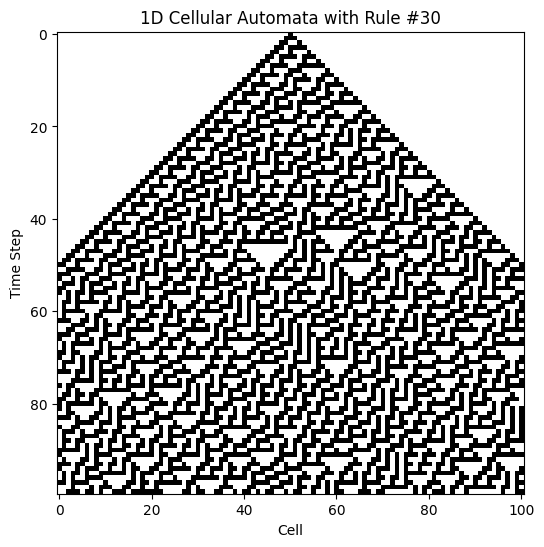

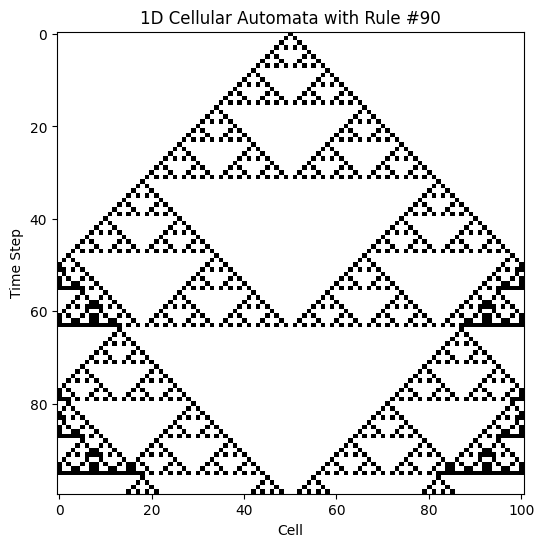

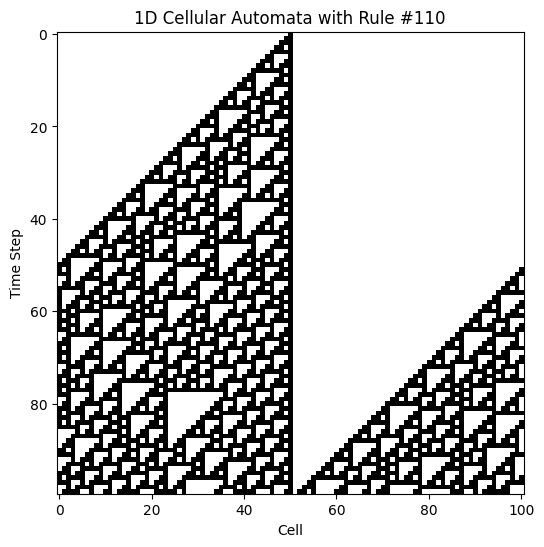

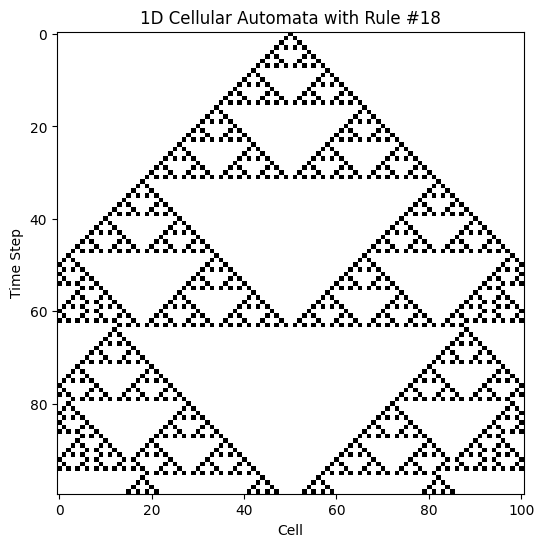

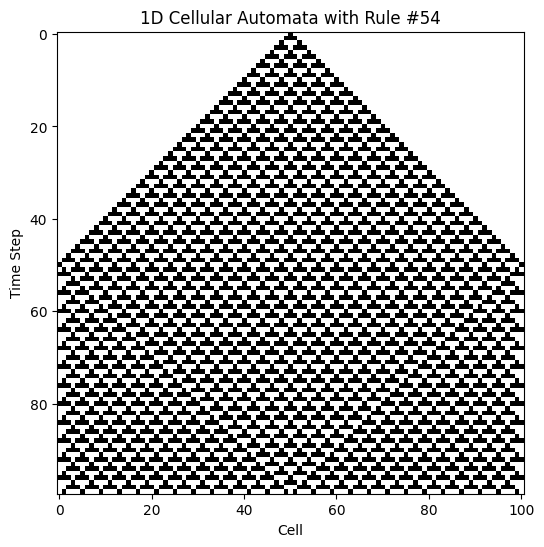

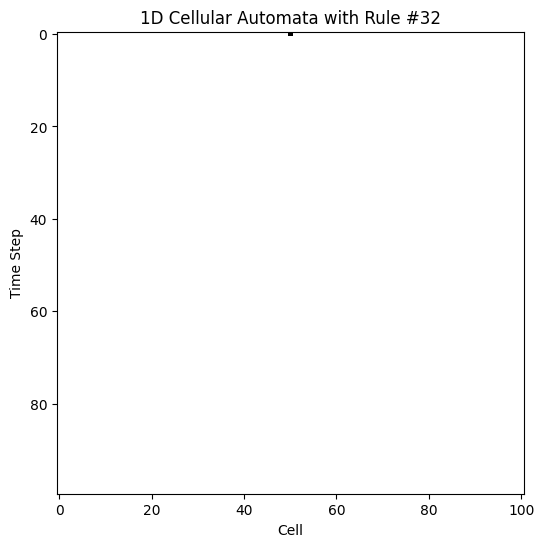

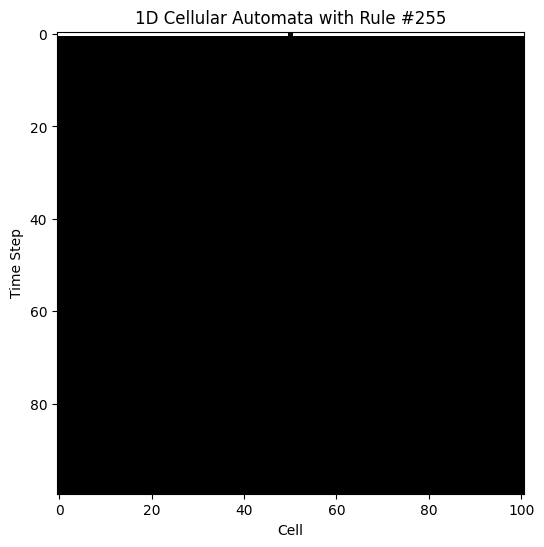

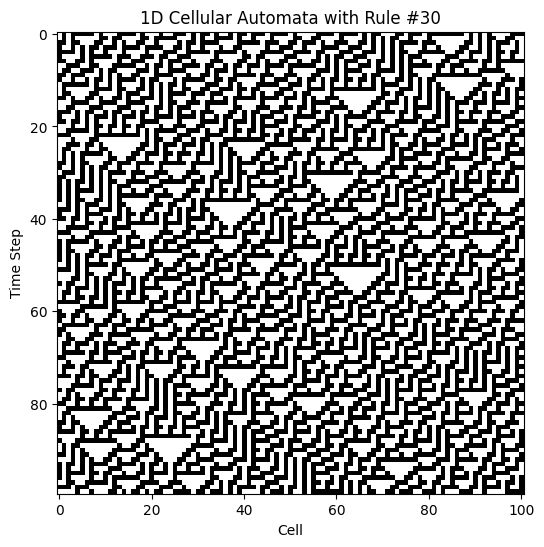

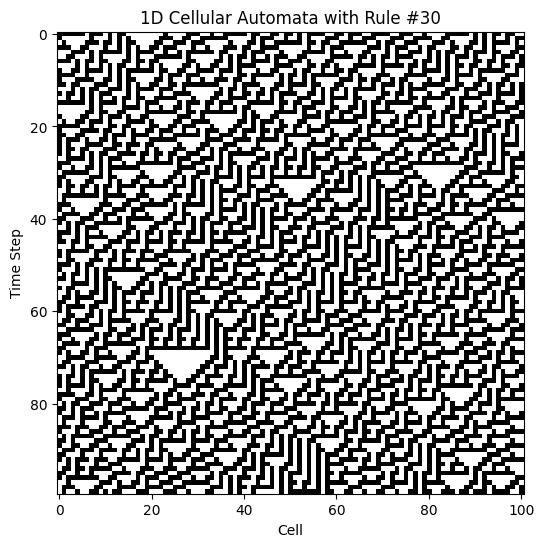

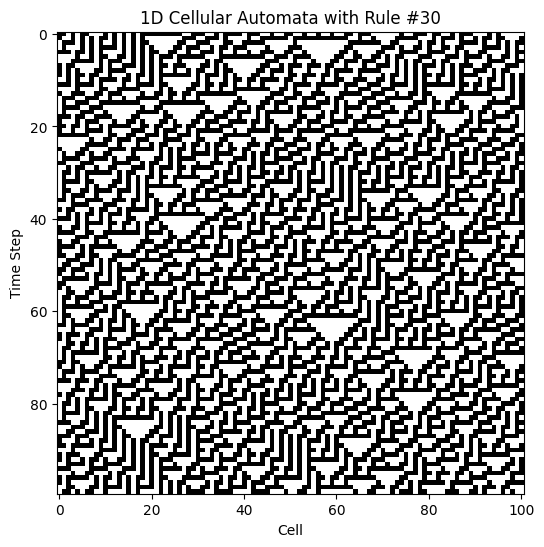

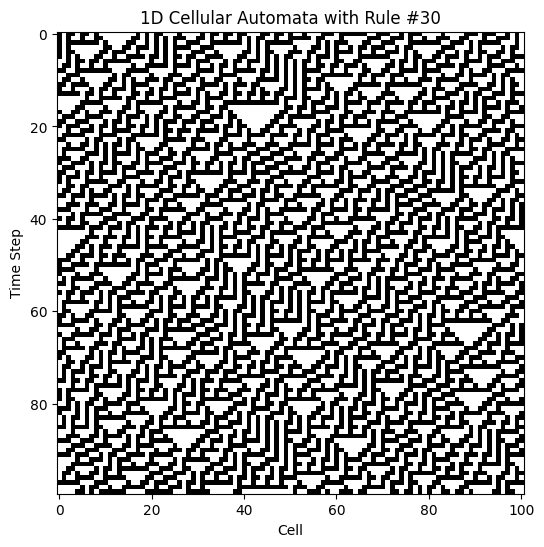

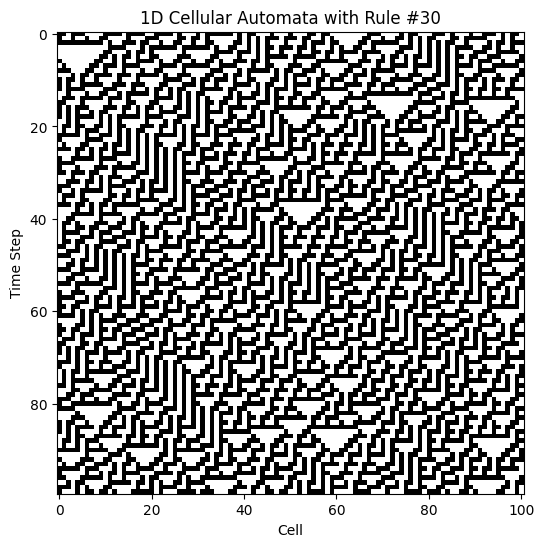

In [ ]:
# Set global variables

steps = 100 # Iterations
size = 101 # Length of row
periodic = True # If True, the grid is wrapped-around

def CA1d(rule_number, size=size, steps=steps, initial_state=None, periodic=periodic):
    grid = np.zeros((steps, size), dtype=int)

    # Set custom initial state
    if initial_state is None:
        grid[0, size // 2] = 1
    else:
        initial = np.array(initial_state[:size])
        if len(initial) < size:
            initial = np.pad(initial, (0, size - len(initial)))
        grid[0] = initial

    for t in range(1, steps):
        for i in range(size):
            # Get neighbors with wrapping (periodic) or fixed edges
            left   = grid[t-1, (i - 1) % size] if periodic else (grid[t-1, i - 1] if i > 0 else 0)
            center = grid[t-1, i]
            right  = grid[t-1, (i + 1) % size] if periodic else (grid[t-1, i + 1] if i < size - 1 else 0)

            # Encode neighborhood as 3-bit number: 4*left + 2*center + 1*right
            neighborhood = (left << 2) | (center << 1) | right

            # Get the rule output by shifting and masking the bit
            grid[t, i] = (rule_number >> neighborhood) & 1

    return grid

def plot_ca(grid,rule_number):
    plt.figure(figsize=(12, 6))
    plt.imshow(grid, cmap='binary')
    plt.title("1D Cellular Automata with Rule #"+str(rule_number))
    plt.xlabel("Cell")
    plt.ylabel("Time Step")
    plt.show()

# Iterate different rules with same initial state

rules = [30, 90, 110, 18, 54, 32, 255] # sample Wolfram rules to try

custom_init = np.random.randint(0, 2, size)

for r in rules:
  grid = CA1d(rule_number=r, size=size, steps=steps, periodic=periodic)
  plot_ca(grid,rule_number=r)

# Iterate different (random) initial state with same rule

rule_number = 30

for i in range(5):
  custom_init = np.random.randint(0, 2, size)
  grid = CA1d(rule_number=rule_number, size=size, steps=steps, initial_state=custom_init, periodic=periodic)
  plot_ca(grid,rule_number=rule_number)

# Insights to the 1D CA:

*   Changing rules results in drastically different patterns, even with the same initial state
*   Changing initial state using the same rule produce slightly different final pattern, though the general "design" is the same
*   Rules 30 and 110 produced chaotic/pseudo-random patterns (class 3), rules 90, 18, and 54 are class 2 - simple stable and periodic patterns, and rules 32 and 255 produces class 1 - homegenous patters.


<Figure size 640x480 with 0 Axes>

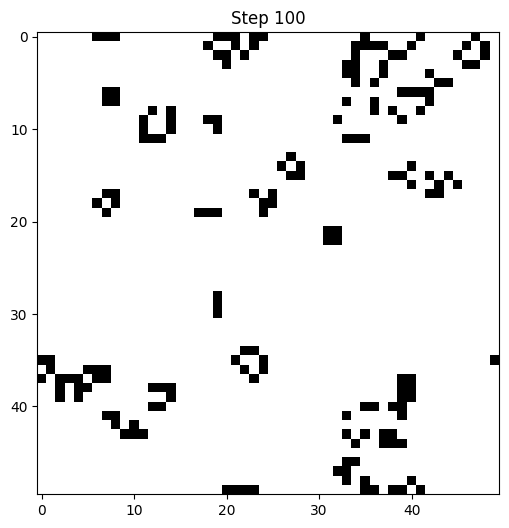

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def count_neighbors(grid):
    # Count live neighbors using convolution-style shift and add
    return sum(np.roll(np.roll(grid, i, 0), j, 1)
               for i in (-1, 0, 1) for j in (-1, 0, 1)
               if not (i == 0 and j == 0))

def step(grid):
    # Compute one generation of Conway's Game of Life
    neighbors = count_neighbors(grid)
    return (neighbors == 3) | ((grid == 1) & (neighbors == 2))

def run_game(initial_state, steps=100):
    # Run Game of Life for a number of steps
    grid = initial_state.copy()
    history = [grid.copy()]
    for _ in range(steps):
        grid = step(grid)
        history.append(grid.copy())
    return history

def plot_history(history):
    # Animate the Game of Life evolution
    plt.figure(figsize=(6, 6))
    for i, grid in enumerate(history):
        clear_output(wait=True)
        plt.figure(figsize=(6, 6))
        plt.imshow(grid, cmap="binary")
        plt.title(f"Step {i}")
        plt.pause(0.1)
        plt.clf()
    #plt.show()

# Example: Random initial state
np.random.seed(101)
initial = np.random.choice([0, 1], (50, 50), p=[0.75, 0.25])
history = run_game(initial, steps=100)
plot_history(history)
